<a href="https://colab.research.google.com/github/noellezeng/AI_ML_Summer_school_projects/blob/main/ML_on_Networks_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries 

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Question 1 - Load graph 

G = nx.read_edgelist('/CA-GrQc.txt', comments='#')

In [ ]:
# Question 2 - Compute various characteristics of the network

def compute_network_characteristics(graph):
    # fill in 
    prop = {}
    prop['N'] = graph.number_of_nodes() # number of nodes
    prop['M'] = graph.number_of_edges() # number of edges
    degrees = graph.degree()# degree list (from dictionnary (node, degree))
    prop['min_degree'] = min(degrees) # minimum degree
    prop['max_degree'] = max(degrees) # maximum degree
    prop['mean_degree'] =  mean(degrees)# mean of node degrees
    prop['median_degree'] = media # median of node degrees
    prop['density'] =  # density of the graph
    return prop


prop = compute_network_characteristics(graph=G)

print("Number of nodes: {}".format(prop['N']))
print("Number of edges: {}".format(prop['M']))
print("Min. degree: {}".format(prop['min_degree']))
print("Max. degree: {}".format(prop['max_degree']))
print("Mean degree: {}".format(prop['mean_degree']))
print("Median degree: {}".format(prop['median_degree']))
print("Density: {}".format(prop['density']))

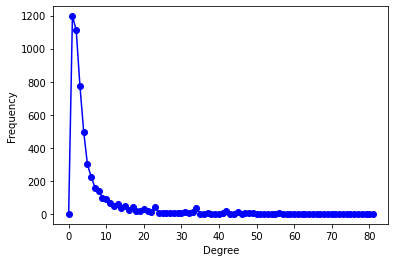

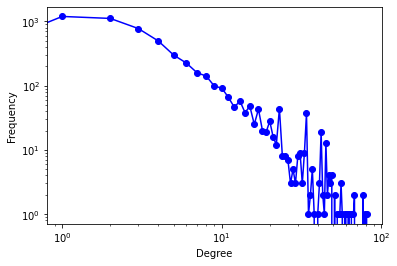

In [ ]:
# Question 3 - Degree distribution

# Degree distribution
y=nx.degree_histogram(G)
plt.figure(1)
plt.plot(y,'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()
#f.savefig("degree.png",format="png")

plt.figure(2)
plt.loglog(y,'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()
#s.savefig("degree_loglog.png",format="png")

In [ ]:
# Question 4 - Connected components of the graph

def get_gcc(graph):
    # fill in the blanks
    
    # Is the given graph connected?
    connected = nx.is_connected(G)# check if the graph is connected or not
    if connected:
        print("The graph is connected")
        return graph
  
    print("The graph is not connected")
    
    # Find the number of connected components
    num_of_cc = len(list(nx.connected_components(graph)))# number of cc
    print("Number of connected components: {}".format(num_of_cc))
    
    # Get the greatest connected component subgraph
    gcc_nodes = max(nx.connected_components(graph),key=len) # node set of gcc
    gcc = graph.subgraph(gcc_nodes)# create a subgraph of G from node set
    node_fraction = gcc.number_of_nodes() / float(graph.number_of_nodes())
    edge_fraction = gcc.number_of_edges() / float(graph.number_of_edges())
    
    print("Fraction of nodes in GCC: {:.3f}".format(node_fraction))
    print("Fraction of edges in GCC: {:.3f}".format(edge_fraction))

    return gcc


gcc = get_gcc(graph=G)

The graph is not connected
Number of connected components: 355
Fraction of nodes in GCC: 0.793
Fraction of edges in GCC: 0.926


In [ ]:
# Question 5 - Average clustering coefficient

avg_clust_coef = nx.average_clustering(G)# fill in 
print("Average clustering coefficient {}".format(avg_clust_coef))

Average clustering coefficient 0.529635811052136


Pearson correlation coefficient (0.595544052125571, 0.0)


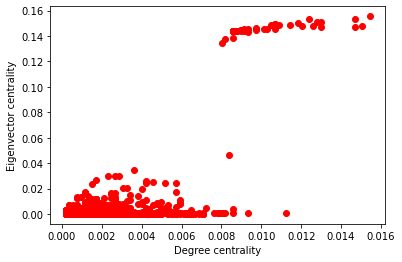

In [ ]:
# Question 6 - Centrality measures

# Degree centrality
deg_centrality = nx.degree_centrality(G)#

# Eigenvector centrality
eig_centrality =nx.eigenvector_centrality(G) #

# Sort centrality values
sorted_deg_centrality = sorted(deg_centrality.items())#
sorted_eig_centrality = sorted(eig_centrality.items()) #

# Extract centralities measures only
deg_data= [b for a,b in sorted_deg_centrality]#
eig_data= [b for a,b in sorted_eig_centrality]#

# Compute Pearson correlation coefficient
from scipy.stats.stats import pearsonr
pr_coef = pearsonr(deg_data, eig_data)#
print("Pearson correlation coefficient {}".format(pr_coef))

# Plot correlation between degree and eigenvector centrality
plt.figure(4)
plt.plot(deg_data, eig_data, 'ro')
plt.xlabel('Degree centrality')
plt.ylabel('Eigenvector centrality')
plt.draw()
plt.show()
#plt.savefig("deg_eig_correlation.png",format="png")


Min degree 0
Max degree 199
Median degree 25.0
Mean degree 59.85


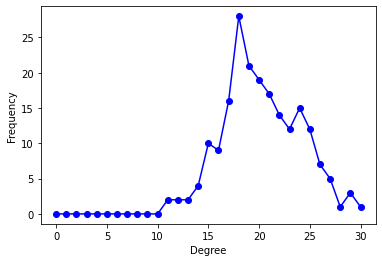

Average clustering coefficient 0.09907120625997326


In [ ]:
# Question 7 (OPTIONAL)
# Generate a random graph with 200 nodes
R = nx.fast_gnp_random_graph(200, 0.1)# 

degree_sequence_random = R.degree()#
print("Min degree {}".format(np.min(degree_sequence_random)))
print("Max degree {}".format(np.max(degree_sequence_random)))
print("Median degree {}".format(np.median(degree_sequence_random)))
print("Mean degree {}".format(np.mean(degree_sequence_random)))

# Degree histogram
r=nx.degree_histogram(R)
plt.figure(5)
plt.plot(r,'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()
#plt.savefig("random_degree.png",format="png")

# Average clustering coefficient - Random graph
avg_clust_coef_R = nx.average_clustering(R)#
print("Average clustering coefficient {}".format(avg_clust_coef_R))